In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Reading my dataset :

In [42]:
df = pd.read_csv('stud.csv')

### Checking the first 5 recoeds of the dataset:

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Checking the shape of our dataset :

In [44]:
df.shape

(1000, 8)

Here there are 1000 rows and 8 columns

### Dataset Information:

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Columns of Dataset:  
Gender - categorical column (Male and Female )  
race_ethenicity - categoricl columns  
parental_level_of_education - categorical column  
lunch - categorical column  
test_preparation_course - categorical column  
math_score - Numerical column  
reading_score - Numberical column  
writing_score - Numerical Column

### Data Checks to Perform on the Dataset:  
1. checking the missing values  
2. check duplicates  
3. check data types  
4. check the number of the unique values
5. check the statistics of the data
6. check the various categories present in the different categorical column

1. Checking the missing values:

In [46]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there is no missing values in the dataset in any of the column 

2. Checking Duplicate values in dataset:

In [47]:
df.duplicated().sum()

0

No duplicate values in the dataset

3. checking the number of uniques values in each feature in the dataset:

checking the null values and the datatypes :

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Getting more information about data :

In [50]:
ug = df['gender'].unique()
print(f'The Unique value is Gender are {len(ug)} : {ug}')

ru = df['race_ethnicity'].unique()
print(f'The unique valus in race_ethnicity are {len(ru)} : {ru}')

pu = df['parental_level_of_education'].unique()
print(f'The unique values inside the parental_level_of_education are {len(pu)} : {pu}')

lu = df['lunch'].unique()
print(f'The unique values in lunch are {len(lu)} : {lu}')

tu = df['test_preparation_course'].unique()
print(f"The Unique inside test_preparation_course are {len(tu)} : {tu}")

The Unique value is Gender are 2 : ['female' 'male']
The unique valus in race_ethnicity are 5 : ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values inside the parental_level_of_education are 6 : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values in lunch are 2 : ['standard' 'free/reduced']
The Unique inside test_preparation_course are 2 : ['none' 'completed']


In [51]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Dividing the Numerical_features and the categorical_features from the dataset:

heres the information about the categorical and the numerical features form the dataset

In [52]:
catergorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']


print('here we have categorical features {0} and are {1}'.format(len(catergorical_features), catergorical_features))
print('Numeric features of the datset are {0} as {1}'.format(len(numerical_features), numerical_features))

here we have categorical features 5 and are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numeric features of the datset are 3 as ['math_score', 'reading_score', 'writing_score']


1. CATEGORICAL FEATURES :  
    gender  
    race_ethnicity    
    parental_level_of_education   
    lunch  
    test_preparation_course  



2. NUMERICAL FEATURES :  
    math_score  
    reading_score  
    writing_score

#### Adding two new columns 'Total_Score' and 'Average_Score':

In [53]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3

In [54]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [55]:
# here we are counting where the math_score column has the score = 100
# we included the avg_score.count() bcz selecting the count for avg score only gives the exact count of how many roes have score = 100
# if not selected svg_score it will give all rows names with value 7
# for reference we are just countign the number of rows of avg_score column

math_full = df[df['math_score'] == 100]['avg_score'].count()
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] ==100]['avg_score'].count()

In [56]:
print(f'The numebr of students with full marks is Math are : {math_full}')
print(f'The number of students with the full marks in reading are : {reading_full}')
print(f'The number of students with full marks in writing are : {writing_full}')

The numebr of students with full marks is Math are : 7
The number of students with the full marks in reading are : 17
The number of students with full marks in writing are : 14


Finding for the Students who have score less than or equal to 20 marks :

In [57]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


found more information about students performance from the dataset 

In [58]:
math_less_20 = df[df['math_score'] <= 20]['avg_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['avg_score'].count()
reading_less_20 = df[df['reading_score'] <= 20]['avg_score'].count()

In [59]:
print('Student Got less than or equal to 20 in Maths are {}'.format(math_less_20))
print('Students got less than or equal to 20 in Writing are {}'.format(writing_less_20))
print('Students got less than or equal to 20 in reading are {}'.format(reading_less_20))

Student Got less than or equal to 20 in Maths are 4
Students got less than or equal to 20 in Writing are 3
Students got less than or equal to 20 in reading are 1


### Visualization of the data :

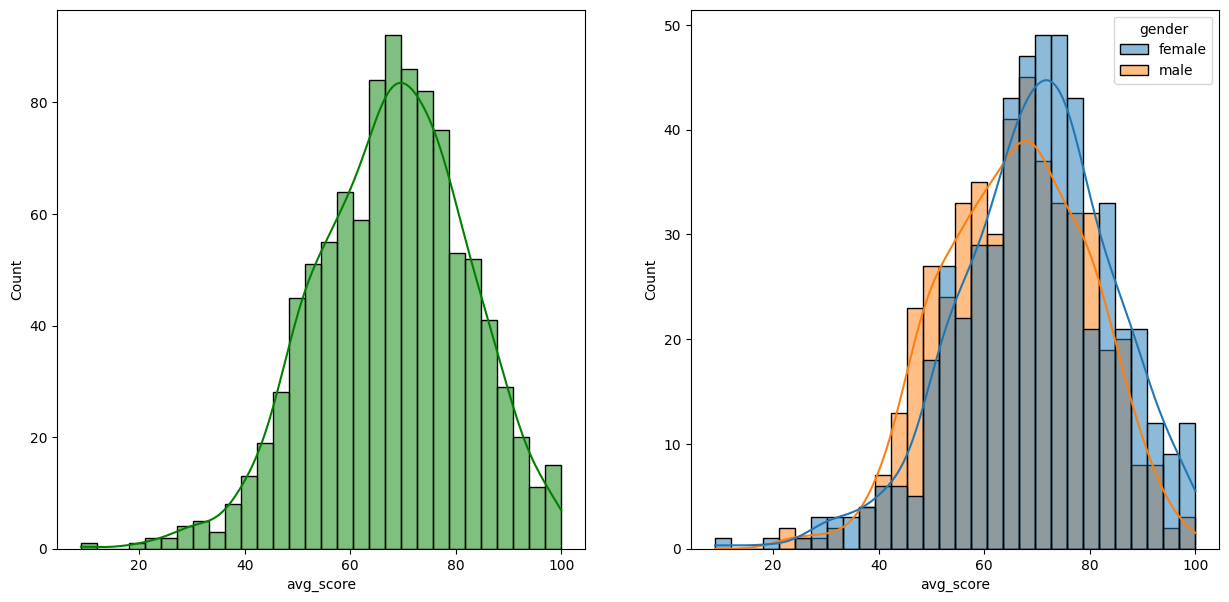

In [60]:
fig , axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'avg_score', kde = True, color = 'g', bins = 30)
plt.subplot(122)
sns.histplot(data = df, x = 'avg_score', kde = True, bins = 30, hue = 'gender')
plt.show()

<Axes: xlabel='avg_score', ylabel='Count'>

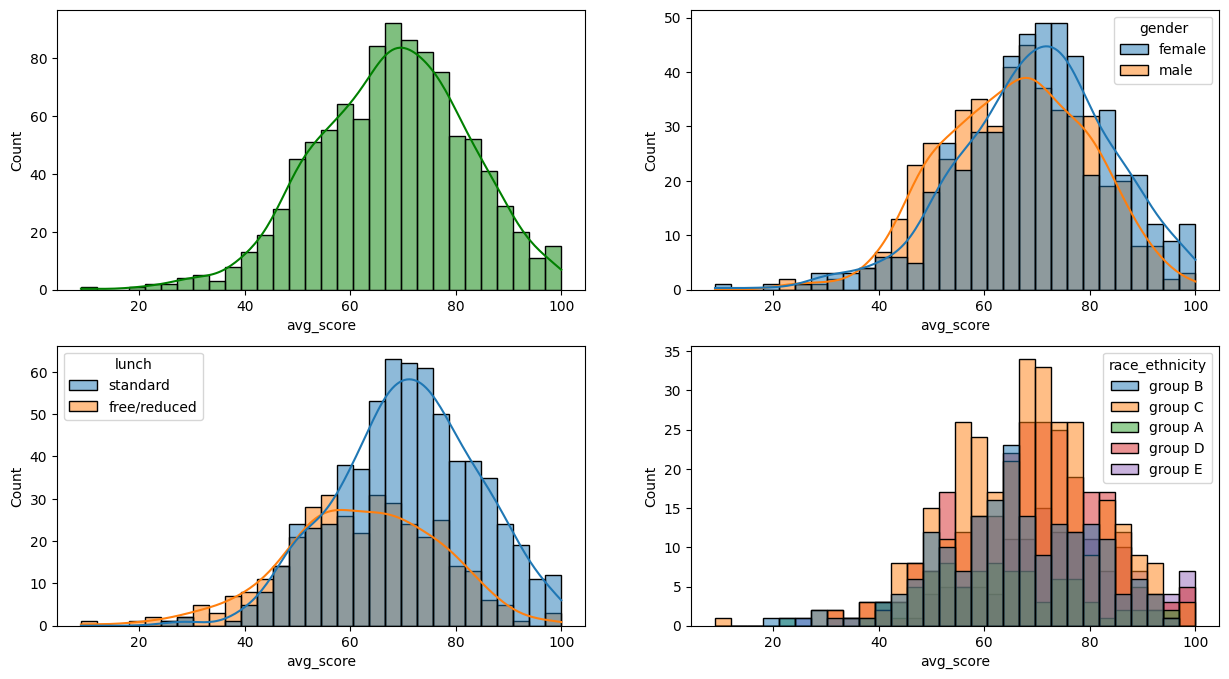

In [61]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))
sns.histplot(data = df, x = 'avg_score', kde = True, color = 'g', bins = 30, ax = axs[0,0])
# plt.subplot(221)
sns.histplot(data = df ,x = 'avg_score',hue = 'gender', kde = True, bins = 30, color = 'g', ax = axs[0,1])
# plt.subplot(222)
sns.histplot(data = df, x = 'avg_score', hue = 'lunch', kde = True, bins = 30, color = 'g', ax = axs[1,0])
# plt.subplot(223)
sns.histplot(data = df, x = 'avg_score', bins = 30, hue = 'race_ethnicity', color = 'r', ax = axs[1,1])

##### INSIGHTS:  
1. Female students has more average score than male students.
2. students getting standard lunch has the better average score than the students who gets the free/reduced lunch.

<Axes: xlabel='avg_score', ylabel='Count'>

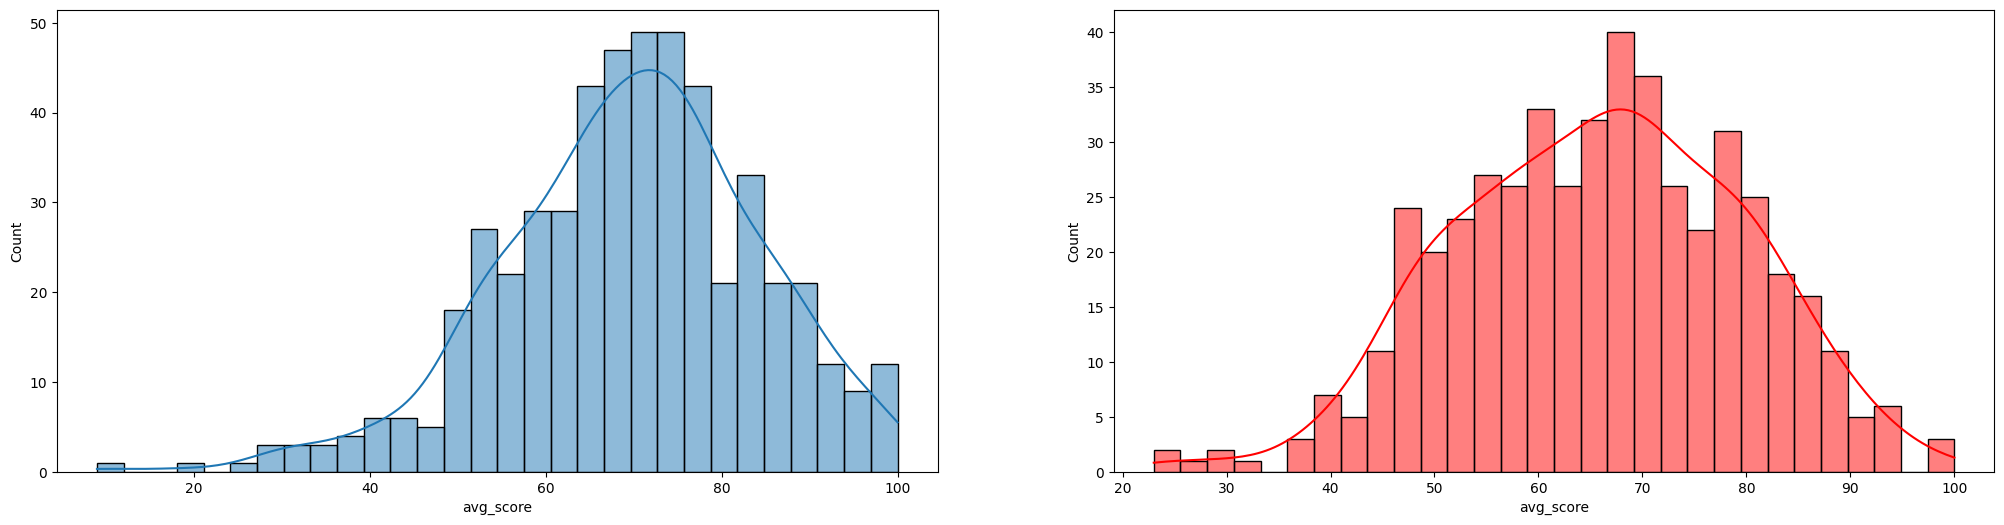

In [62]:
fig, axs = plt.subplots(1, 2, figsize = (25, 6))
sns.histplot(data = df[df.gender == 'female'], x = 'avg_score', bins = 30, kde = True, ax = axs[0])
sns.histplot(data = df[df.gender == 'male'], x = 'avg_score', kde = True, bins = 30, color = 'r', ax = axs[1])

1. Most of the female students average score falls between 50 to 90.  
2. most of the Male students average score falls between around 48 to 84. 

<Axes: xlabel='total_score', ylabel='Count'>

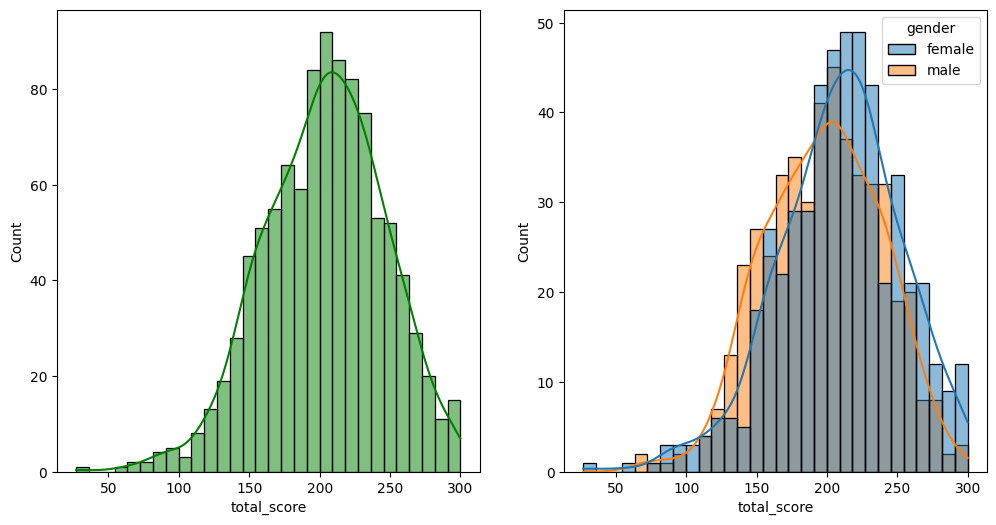

In [63]:
fig, axs = plt.subplots(1,2, figsize = (12, 6))
sns.histplot(data= df , x ='total_score', bins = 30, color = 'g', kde = True, ax = axs[0])
sns.histplot(data = df, x = 'total_score', hue = 'gender',bins = 30, kde = True, color = 'r', ax = axs[1])

<Axes: xlabel='total_score', ylabel='Count'>

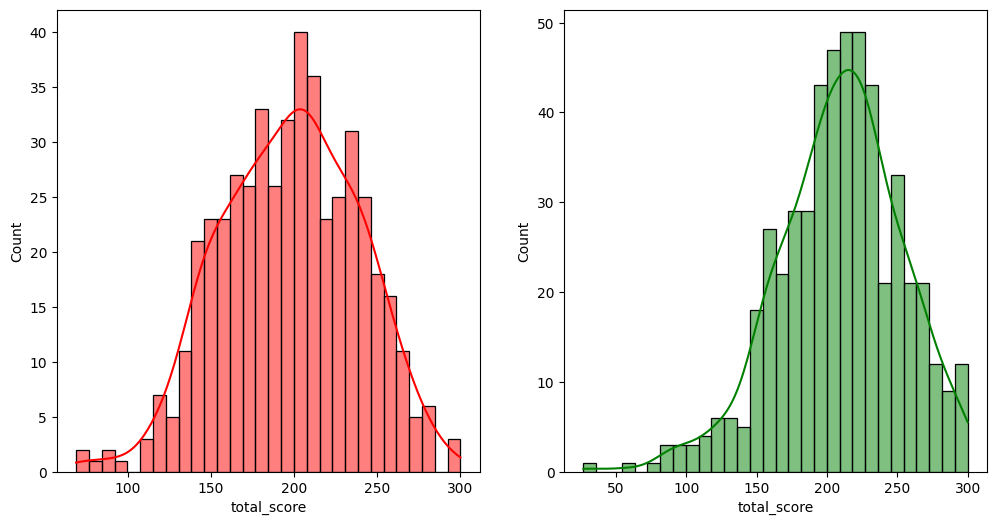

In [64]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(data = df[df['gender'] == 'male'], x = 'total_score', kde = True, bins = 30, color = 'r', ax = axs[0])
sns.histplot(data = df[df['gender'] == 'female'], x = 'total_score', kde = True, bins = 30, color = 'g', ax = axs[1])

<Axes: xlabel='avg_score', ylabel='Count'>

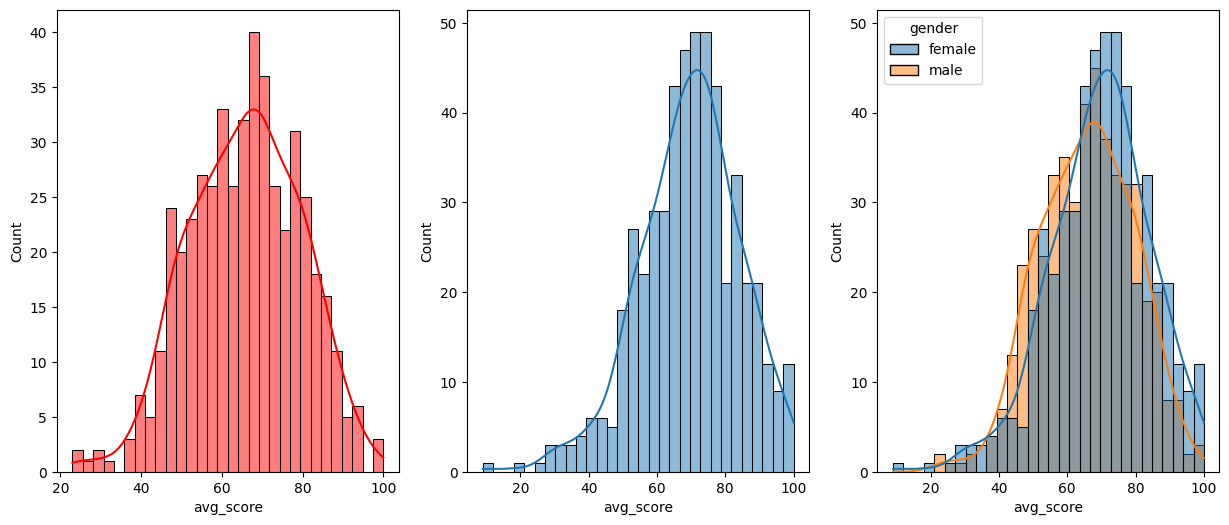

In [65]:

fig, axs = plt.subplots(1,3, figsize = (15, 6))
sns.histplot(data = df[df['gender'] == 'male'], x = 'avg_score', kde = True, ax = axs[0],color = 'red', bins = 30)
sns.histplot(data = df[df['gender'] == 'female'], x = 'avg_score', kde = True, ax = axs[1], bins = 30)
sns.histplot(data = df, x = 'avg_score', hue = 'gender', kde = True, color = 'g', ax = axs[2], bins = 30)

<Axes: ylabel='writing_score'>

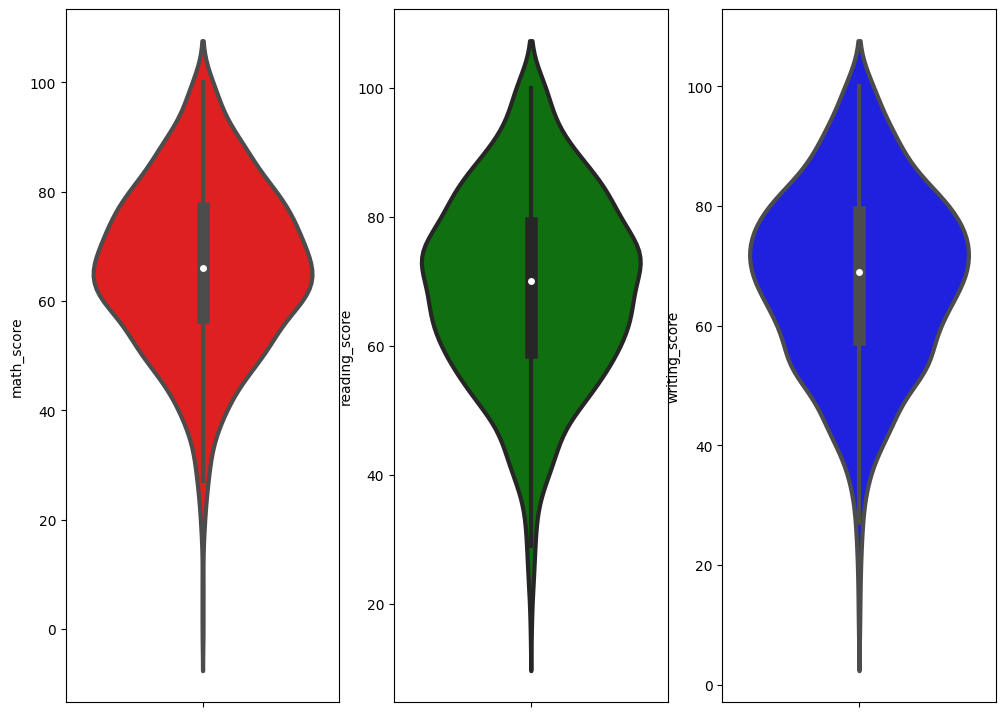

In [66]:
# plt.figure(figsize = (15, 9))
fig , axs = plt.subplots(1, 3, figsize = (12, 9))
sns.violinplot(data = df, y = 'math_score', linewidth=3, color = 'red', ax = axs[0])
sns.violinplot(data = df, y = 'reading_score', linewidth=3, color = 'green', ax = axs[1])
sns.violinplot(data = df, y = 'writing_score', linewidth = 3, color = 'blue', ax = axs[2])

##### INSIGHTS :  
1. Math : Most of the students in Math have score between 60 to 80.  
2. Reading : Most of students in reading have score between 50 to 80.  
3. Writing : Most of students in writing have score between 50 to 80  

In [67]:
size = df['gender'].value_counts()
size

gender
female    518
male      482
Name: count, dtype: int64

In [68]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [69]:
catergorical_features
df['parental_level_of_education'].nunique()

6

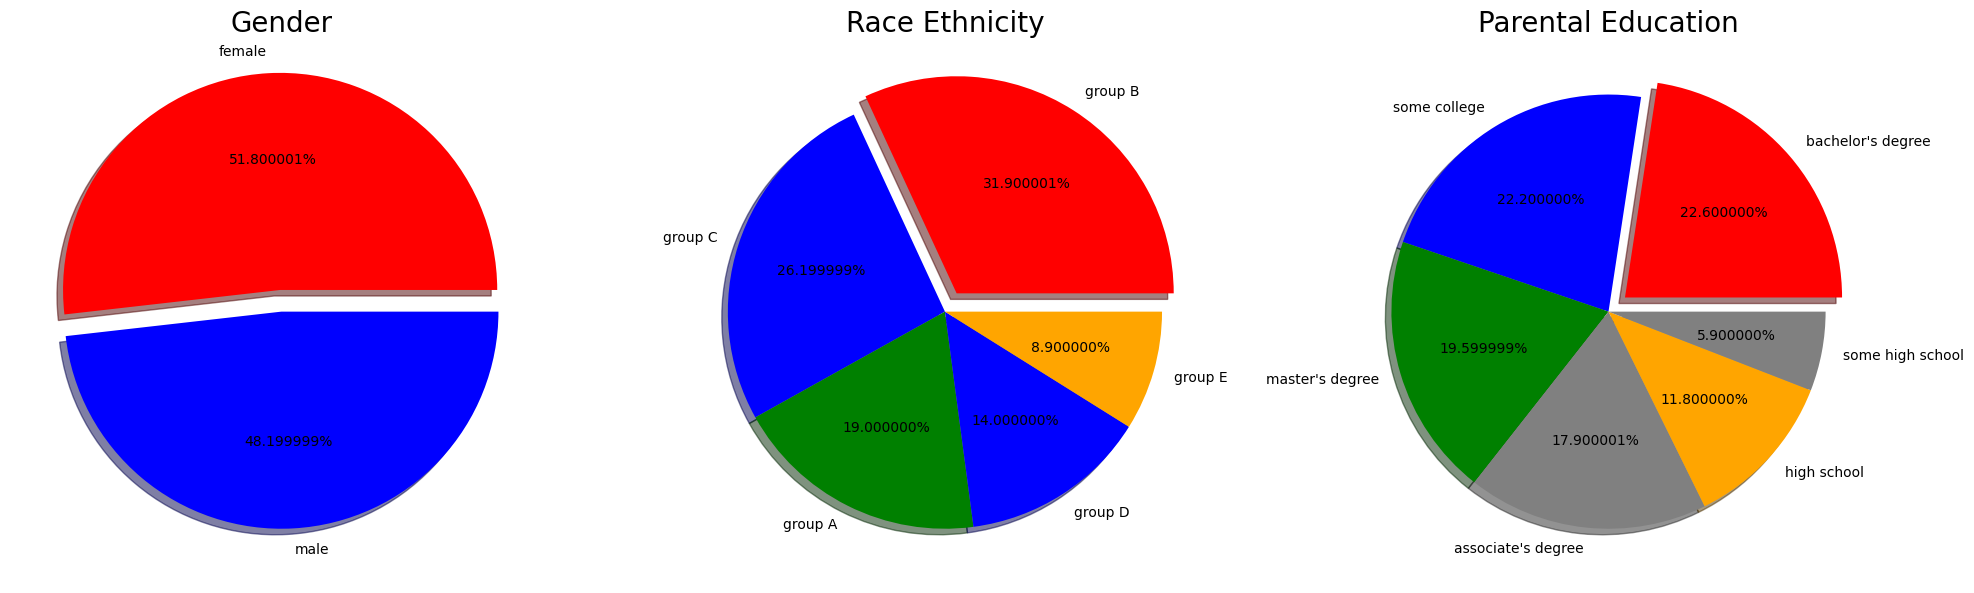

In [70]:
# fig, axs = plt.subplots(1, 5, figsize = (15, 5))
plt.rcParams['figure.figsize'] = (20, 6)

plt.subplot(1,3,1)
size = df['gender'].value_counts()
label = df['gender'].unique()
color = ['red', 'blue']
plt.pie(size , labels=label, colors=color, autopct = "%2f%%", explode = [0.1, 0], shadow = True)
plt.title('Gender', fontsize = 20)

plt.subplot(1,3,2)
size = df['race_ethnicity'].value_counts()
label = df['race_ethnicity'].unique()
color = ['red', 'blue', 'green', 'blue', 'orange', 'grey']
plt.pie(size , labels = label, colors = color, autopct='%2f%%', explode=[0.1, 0, 0, 0, 0], shadow = True)
plt.title('Race Ethnicity', fontsize = 20)


plt.subplot(1, 3, 3)
size = df['parental_level_of_education'].value_counts()
label = df['parental_level_of_education'].unique()
color = ['red', 'blue', 'green', 'gray', 'orange', 'grey','cyan']
plt.pie(size, labels = label, colors = color, autopct = '%2f%%', explode = [0.1,0,0,0,0,0], shadow = True)
plt.title('Parental Education', fontsize = 20)
plt.tight_layout()

#### INSIGHTS :  
1. Male and Female students are almost same.  
2. Number of sudents are greater in group B.
3. Most students have their parental eduction about bachlores degree and some college

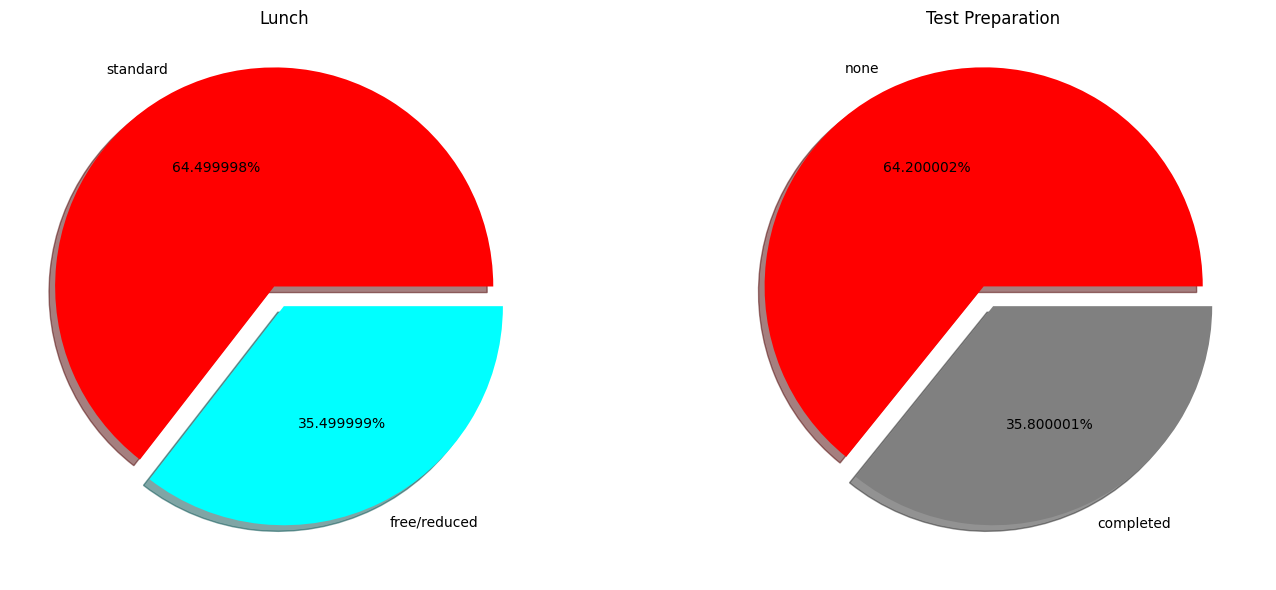

In [71]:
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1,2,1)
size = df['lunch'].value_counts()
label = df['lunch'].unique()
color = ['red','cyan']
plt.pie(size, labels = label, colors = color, autopct='%2f%%', explode = [0.1, 0], shadow = True)
plt.title('Lunch')

plt.subplot(1, 2, 2)
size = df['test_preparation_course'].value_counts()
label = df['test_preparation_course'].unique()
color = ['red', 'gray']
plt.pie(size , labels = label, colors = color, autopct = '%2f%%', explode = [0.1, 0], shadow = True)
plt.title('Test Preparation')

plt.tight_layout()

#### INSIGHTS :  
1. There are more number of students having 'standard' lunch.
2. More number of students have 'None' preparation for the test.

### Univariet Analaysis : Gender

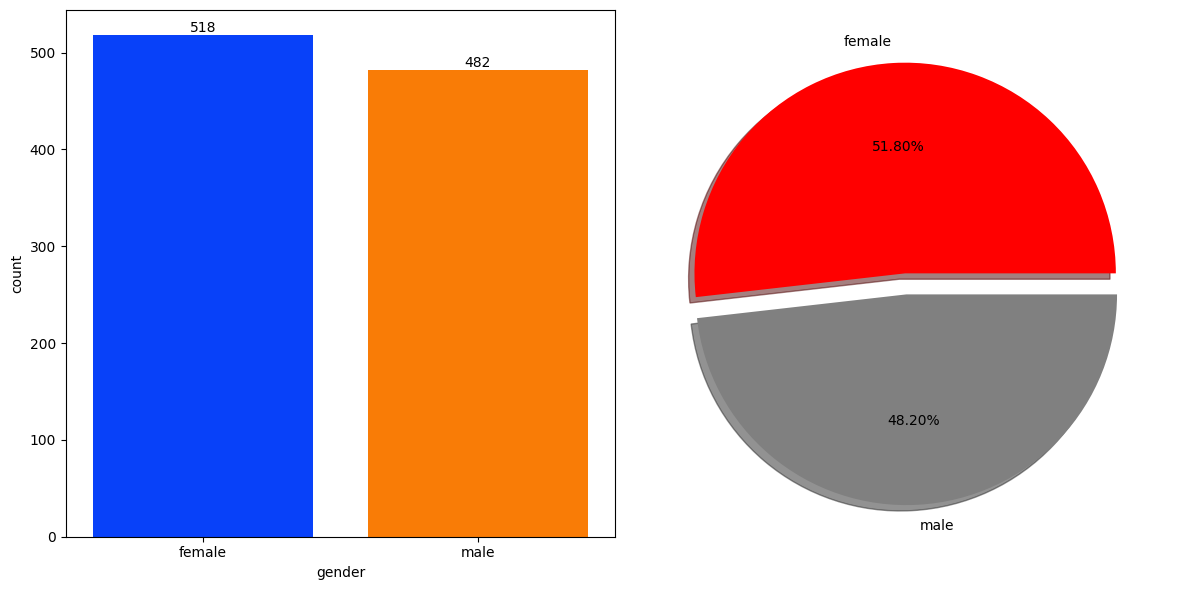

In [72]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
sns.countplot(data = df, x = 'gender',palette='bright',saturation= 0.95, ax = axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container, fontsize = 10)

size = df['gender'].value_counts()
label = df['gender'].unique()
color = ['red', 'gray']
plt.pie(size , labels = label, colors = color, explode = [0, 0.1], autopct = '%1.2f%%', shadow = True)
plt.tight_layout()

### Bivariet Analysis : 

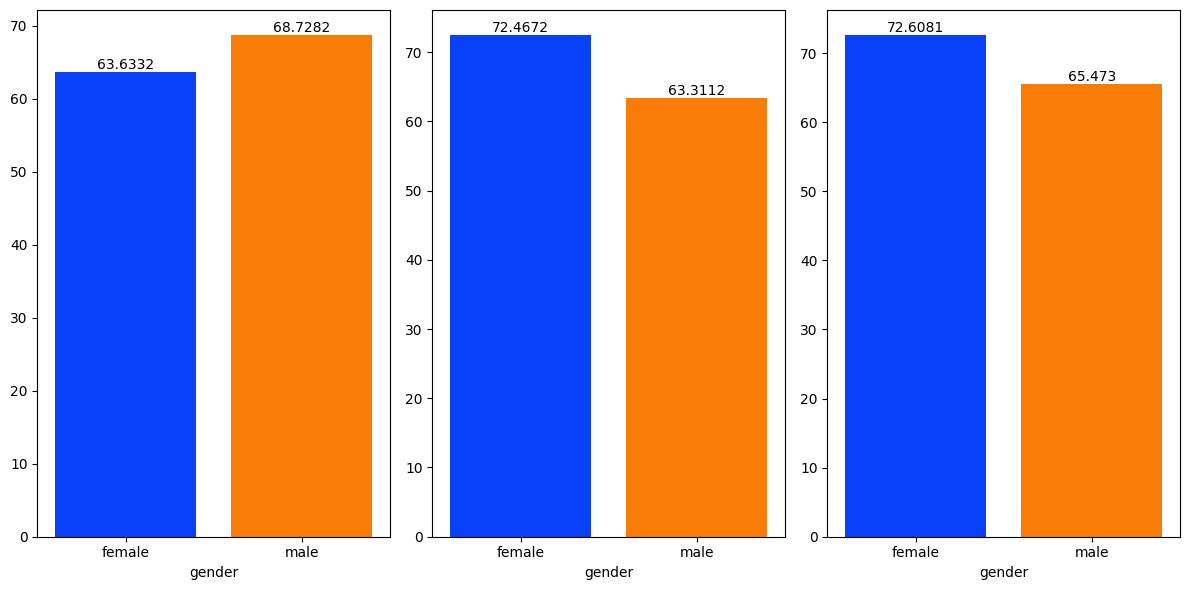

In [73]:
group_gender = df.groupby('gender')

fig, axs = plt.subplots(1, 3, figsize = (12, 6))

sns.barplot(x = group_gender['math_score'].mean().index,y = group_gender['math_score'].mean().values ,palette='bright', saturation = 0.95, ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container, fontsize = 10)

sns.barplot(x = group_gender['writing_score'].mean().index, y = group_gender['writing_score'].mean().values, palette = 'bright', saturation=0.95, ax = axs[1])
for container in axs[1].containers:
    axs[1].bar_label(container, fontsize = 10)

sns.barplot(x = group_gender['reading_score'].mean().index, y = group_gender['reading_score'].mean().values, palette = 'bright',saturation =0.95, ax = axs[2])
for container in axs[2].containers:
    axs[2].bar_label(container, fontsize = 10)

plt.tight_layout()


### Univariet Analysis : Race Ethnicity

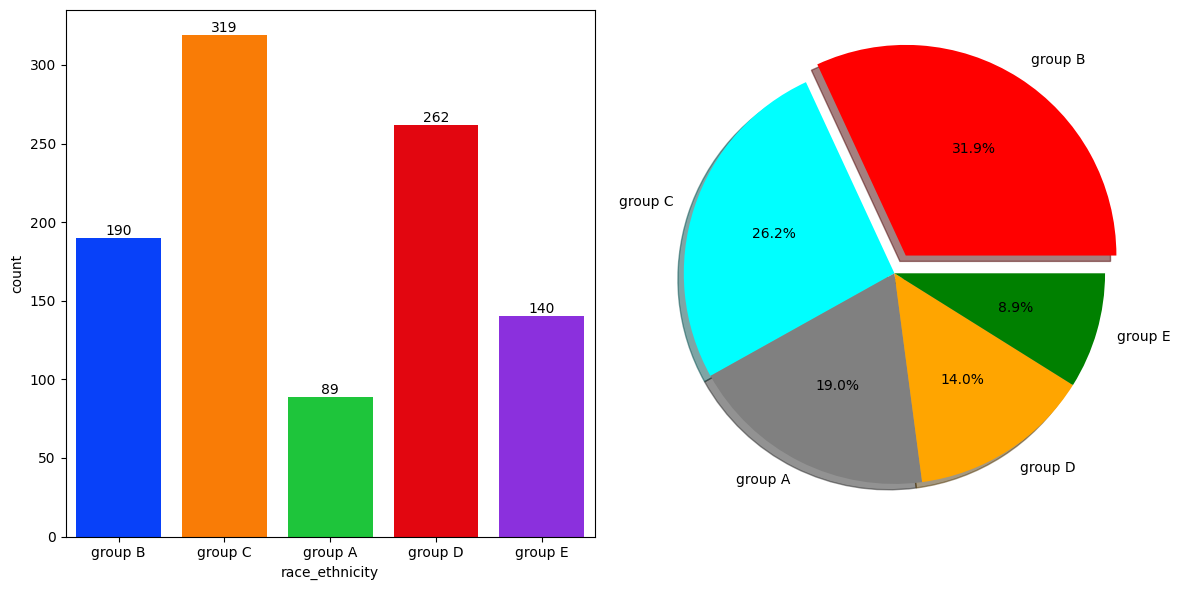

In [74]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

sns.countplot(data = df, x = df['race_ethnicity'], palette='bright', saturation = 0.95, ax = axs[0])
for x in axs[0].containers:
    axs[0].bar_label(x, fontsize = 10)

size = df['race_ethnicity'].value_counts()
label = df['race_ethnicity'].unique()
color = ['red', 'cyan', 'gray', 'orange', 'green']
plt.pie(size , labels = label, colors = color, shadow=True, explode=[0.1,0,0,0,0], autopct = '%1.1f%%')

plt.tight_layout()

### Bivariet Analysis :

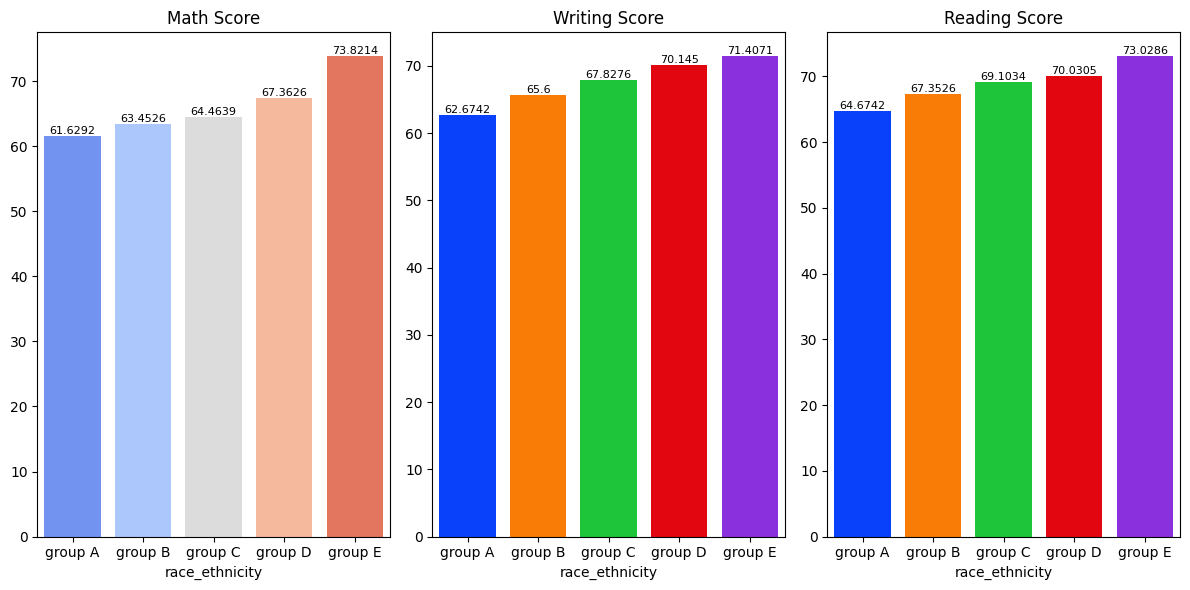

In [75]:
group_race = df.groupby('race_ethnicity')

fig, axs = plt.subplots(1, 3, figsize = (12, 6))
sns.barplot(x = group_race['math_score'].mean().index , y = group_race['math_score'].mean().values, palette = 'coolwarm', saturation = 0.95, ax = axs[0])
for x in axs[0].containers:
    axs[0].bar_label(x, fontsize = 8)
axs[0].set_title('Math Score')

sns.barplot(x = group_race['writing_score'].mean().index, y = group_race['writing_score'].mean().values, palette = 'bright', saturation = 0.95, ax = axs[1])
for x in axs[1].containers:
    axs[1].bar_label(x, fontsize = 8)
axs[1].set_title('Writing Score')

sns.barplot(x = group_race['reading_score'].mean().index, y = group_race['reading_score'].mean().values, palette = 'bright', saturation = 0.95, ax = axs[2])
for y in axs[2].containers:
    axs[2].bar_label(y, fontsize = 8)
axs[2].set_title('Reading Score')

plt.tight_layout()


In [76]:
catergorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Univariet Analysis : Parental Education

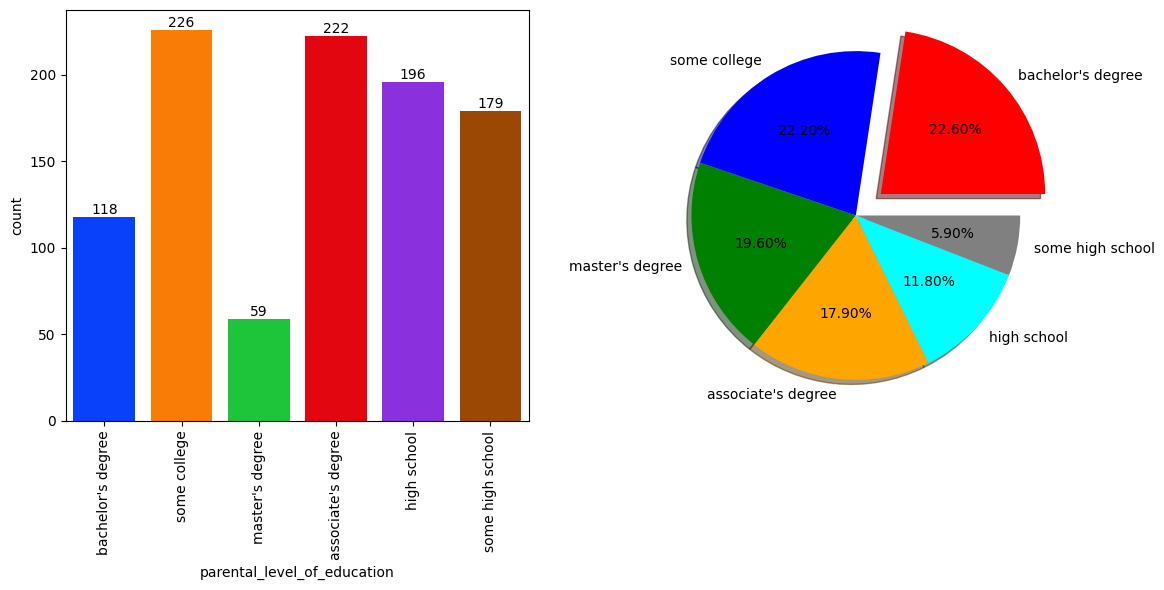

In [77]:
fig , axs = plt.subplots(1, 2, figsize = (12, 6))

sns.countplot(data = df, x = df['parental_level_of_education'], palette = 'bright', saturation = 0.95, ax = axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container, fontsize = 10)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)


size = df['parental_level_of_education'].value_counts()
label = df['parental_level_of_education'].unique()
color = ['red','blue','green','orange','cyan','gray']
plt.pie(size , labels = label, colors = color, autopct = '%1.2f%%', explode = [0.2, 0,0,0,0,0], shadow = True)

plt.tight_layout()

### Bivariet Analysis :

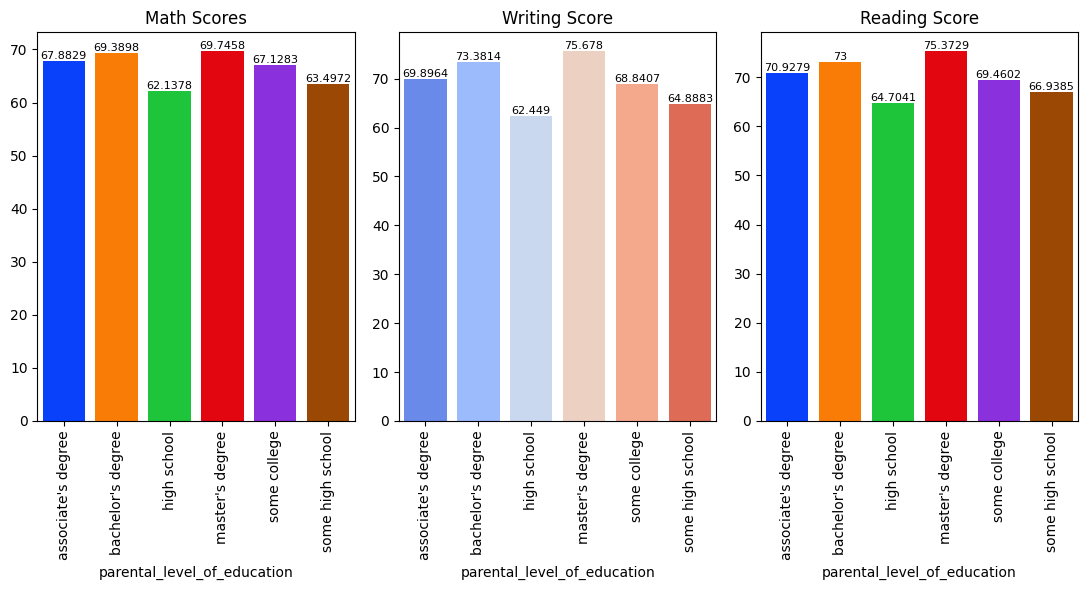

In [78]:
fig , axs = plt.subplots(1, 3, figsize = (11, 6))
group_parented = df.groupby('parental_level_of_education')


sns.barplot(x = group_parented['math_score'].mean().index, y = group_parented['math_score'].mean().values, ax = axs[0], palette = 'bright', saturation = 0.95)
for x in axs[0].containers:
    axs[0].bar_label(x, fontsize = 8)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90)
axs[0].set_title('Math Scores')

sns.barplot(x = group_parented['writing_score'].mean().index, y = group_parented['writing_score'].mean().values, palette = 'coolwarm', saturation = 0.95, ax = axs[1])
for x in axs[1].containers:
    axs[1].bar_label(x, fontsize = 8)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90)
axs[1].set_title('Writing Score')

sns.barplot(x = group_parented['reading_score'].mean().index, y = group_parented['reading_score'].mean().values, palette = 'bright', saturation = 0.95, ax = axs[2])
for i in axs[2].containers:
    axs[2].bar_label(i, fontsize = 8)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation = 90)
axs[2].set_title('Reading Score')

plt.tight_layout()

### Univariet Analysis : Lunch

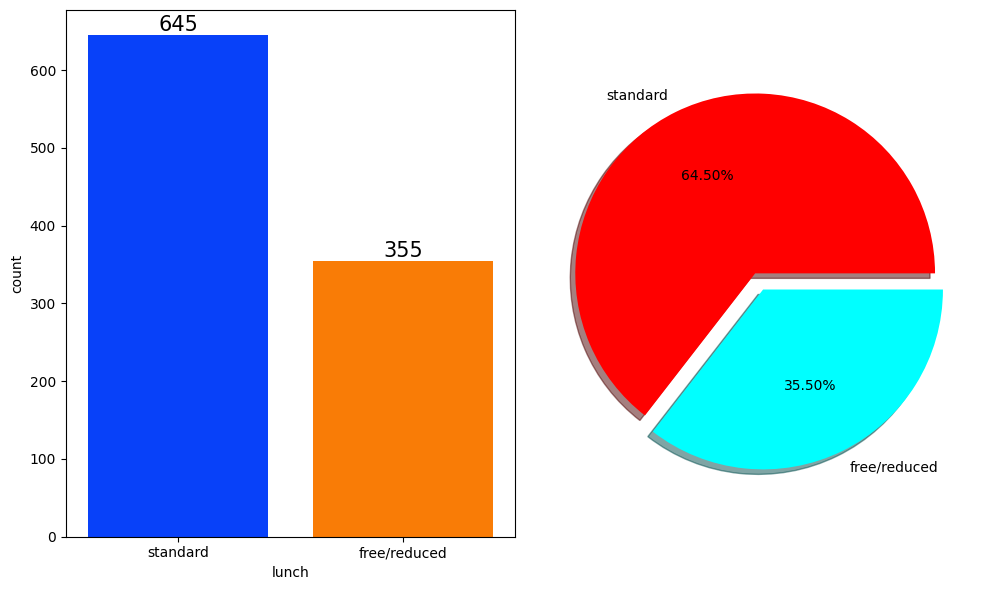

In [79]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(data = df, x = df['lunch'], palette = 'bright', saturation=0.95, ax = axs[0])
for x in axs[0].containers:
    axs[0].bar_label(x, fontsize = 15)

size = df['lunch'].value_counts()
label = df['lunch'].unique()
color = ['red', 'cyan']
plt.pie(size, labels = label, colors = color, explode = [0, 0.1], shadow = True, autopct = '%.2f%%')

plt.tight_layout()

### Bivariet Analysis :

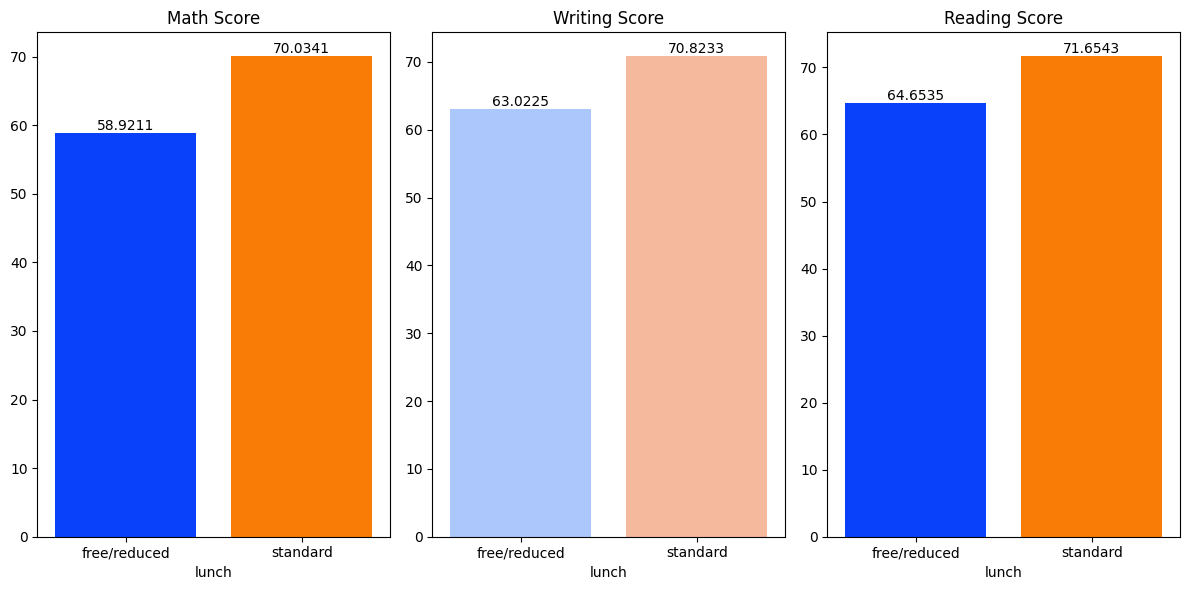

In [80]:
fig, axs = plt.subplots(1, 3, figsize = (12, 6))
group_lunch = df.groupby('lunch')

sns.barplot(x = group_lunch['math_score'].mean().index, y = group_lunch['math_score'].mean().values, palette = 'bright', saturation = 0.95, ax = axs[0])
for x in axs[0].containers:
    axs[0].bar_label(x, fontsize = 10)
axs[0].set_title('Math Score')

sns.barplot(x = group_lunch['writing_score'].mean().index, y = group_lunch['writing_score'].mean().values, palette = 'coolwarm', saturation = 0.95, ax = axs[1])
for x in axs[1].containers:
    axs[1].bar_label(x, fontsize = 10)
axs[1].set_title('Writing Score')

sns.barplot(x = group_lunch['reading_score'].mean().index, y = group_lunch['reading_score'].mean().values, ax = axs[2], palette = 'bright', saturation = 0.95)
for x in axs[2].containers:
    axs[2].bar_label(x , fontsize = 10)
axs[2].set_title('Reading Score')

plt.tight_layout()

In [81]:
catergorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Univariet Analysis : Test Preparation Course

([<matplotlib.patches.Wedge at 0x29bf39ceb80>,
 [Text(-0.56089293141604, 1.1727741127290974, 'none'),
  Text(0.4746018041084478, -0.9923472817199666, 'completed')],
 [Text(-0.3451648808714092, 0.721707146294829, '64.20%'),
  Text(0.2588737113318806, -0.5412803354836181, '35.80%')])

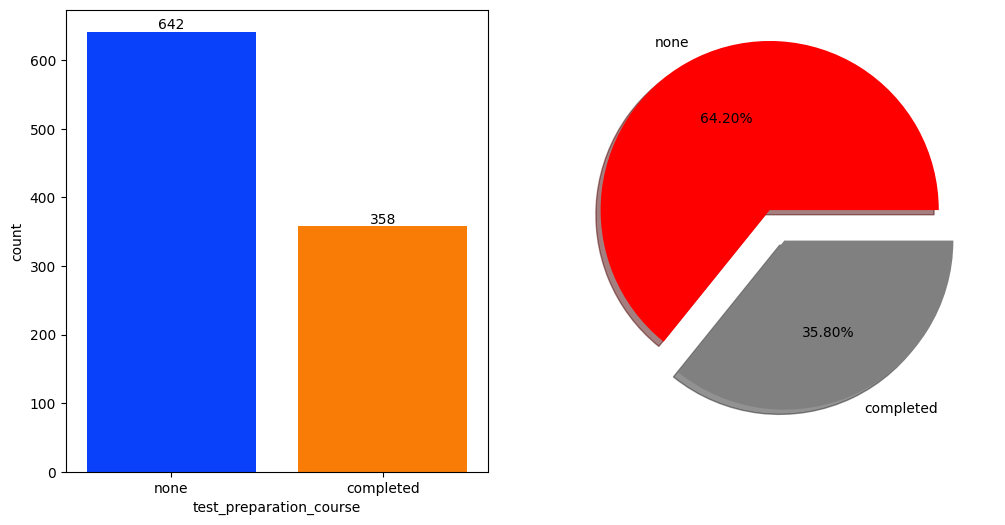

In [88]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

# Countplot for the insights about the quantity of the test_preparation course dataset
# 1. None
# 2. Completed

sns.countplot(data = df, x = df['test_preparation_course'], palette = 'bright', saturation = 0.95, ax = axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container, fontsize = 10)

# Pie plot for the insights about the total part destribution of the data
    
size = df['test_preparation_course'].value_counts()
label = df['test_preparation_course'].unique()
color = ['red','gray']
plt.pie(size, labels = label, colors = color, explode = [0.2,0], shadow = True, autopct = '%.2f%%')

<Axes: xlabel='test_preparation_course'>

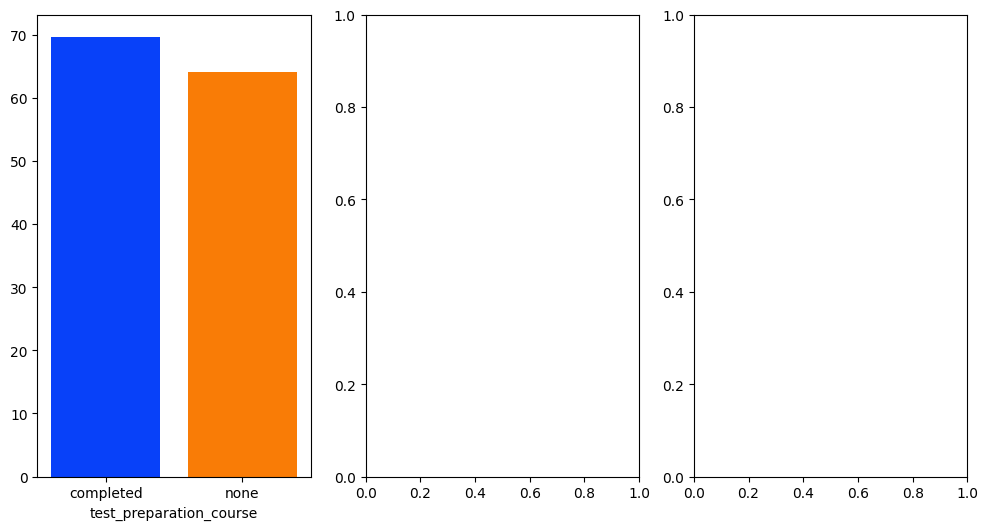

In [91]:
grp_prep = df.groupby('test_preparation_course')

fig, axs = plt.subplots(1, 3, figsize = (12,6))
sns.barplot(x = grp_prep['math_score'].mean().index, y = grp_prep['math_score'].mean().values, ax = axs[0], palette = 'bright', saturation = 0.95)